In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I went to following link: https://evolgeniusteam.github.io/gmrepodocumentation/usage/downloaddatafromgmrepo/

I download Processed runs (samples_loaded.txt here) that has both uid and sample id which help to map samples to relative abundance profile

I downloaded relative abundances (species_abundance.txt here) that has relative abundance for each taxon for eaxh sample. I made relative abundance profile based on it

I downloaded All runs (samlpe_to_run_info.txt here) that has metadata for each sample. 



### whole data preprocessing and filtering

In [18]:
# Set the display option to show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.min_rows', None)

In [3]:
relative_abundance = pd.read_csv('species_abundance.txt', delimiter='\t')  # Adjust the delimiter as needed

In [4]:
relative_abundance.shape

(8283371, 4)

In [5]:
print(relative_abundance.columns)

Index(['loaded_uid', 'ncbi_taxon_id', 'taxon_rank_level',
       'relative_abundance'],
      dtype='object')


In [6]:
relative_abundance_df = relative_abundance.pivot_table(index='loaded_uid', columns='ncbi_taxon_id', values='relative_abundance', fill_value=0)


In [7]:
relative_abundance_df

ncbi_taxon_id,-1,6,7,9,10,11,13,14,16,17,...,2212691,2212731,2282523,2282740,2282741,2282742,2304691,2304692,2339232,2529408
loaded_uid,,,,,,,,,,,,,,,,,,,,,
1,1.503245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11.210800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.496660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5.832720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.147945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52855,14.686035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52856,2.268080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52857,3.817365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Drop the column named '-1'
relative_abundance_df = relative_abundance_df.drop(columns=[-1])

# Remove columns that have less than 2 non-zero values
relative_abundance_df = relative_abundance_df.loc[:, (relative_abundance_df != 0).sum(axis=0) >= 2]



In [9]:
relative_abundance_df

ncbi_taxon_id,6,7,9,10,11,13,14,16,17,18,...,2211641,2212691,2212731,2282523,2282740,2282741,2282742,2304691,2304692,2529408
loaded_uid,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
52857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
relative_abundance_df.to_csv('relative_abundance.csv')

metadata

In [3]:
relative_abundance_df = pd.read_csv('relative_abundance.csv', index_col = False)

In [4]:
relative_abundance_df

,loaded_uid,6,7,9,10,11,13,14,16,17,...,2211641,2212691,2212731,2282523,2282740,2282741,2282742,2304691,2304692,2529408
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32239,52855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32240,52856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32241,52857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32242,52858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
metadata = pd.read_csv('sample_to_run_info.txt', delimiter='\t')

/tmp/ipykernel_3045288/477576356.py:1: DtypeWarning: Columns (0,2,5,14,15,22,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('sample_to_run_info.txt', delimiter='\t')


In [6]:
metadata

,checking,project_id,our_project_id,sample_name,original_sample_description,curated_sample_description,run_id,sample_id,second_sample_id,experiment_type,...,sex,host_age,diet,longitude,latitude,BMI,Recent.Antibiotics.Use,antibiotics_used,Antibiotics.Dose,Days.Without.Antibiotics.Use
0,1,PRJDB4360,NaN,Japanese001,Healthy Japanese gut microbiota,NaN,DRR048993,NaN,SAMD00042843,Amplicon,...,Female,28.0,NaN,139.680,35.4800,NaN,NaN,NaN,NaN,NaN
1,1,PRJDB4360,NaN,Japanese002,Healthy Japanese gut microbiota,NaN,DRR048994,NaN,SAMD00042844,Amplicon,...,Male,31.0,NaN,139.680,35.4800,NaN,NaN,NaN,NaN,NaN
2,1,PRJDB4360,NaN,Japanese003,Healthy Japanese gut microbiota,NaN,DRR048995,NaN,SAMD00042845,Amplicon,...,Male,60.0,NaN,139.680,35.4800,NaN,NaN,NaN,NaN,NaN
3,1,PRJDB4360,NaN,Japanese004,Healthy Japanese gut microbiota,NaN,DRR048996,NaN,SAMD00042846,Amplicon,...,Male,57.0,NaN,139.680,35.4800,NaN,NaN,NaN,NaN,NaN
4,1,PRJDB4360,NaN,Japanese005,Healthy Japanese gut microbiota,NaN,DRR048997,NaN,SAMD00042847,Amplicon,...,Male,29.0,NaN,139.680,35.4800,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66575,1,PRJNA215106,NaN,F34_CY,Functional metagenomic selections were perform...,NaN,SRR961853,SAMN02317178,SAMN02317178,Metagenomics,...,NaN,0.7,NaN,-122.268,47.6614,NaN,NaN,NaN,NaN,NaN
66576,1,PRJNA215106,NaN,F34_PE,Functional metagenomic selections were perform...,NaN,SRR961854,SAMN02317178,SAMN02317178,Metagenomics,...,NaN,0.7,NaN,-122.268,47.6614,NaN,NaN,NaN,NaN,NaN
66577,1,PRJNA215106,NaN,F34_TE,Functional metagenomic selections were perform...,NaN,SRR961855,SAMN02317178,SAMN02317178,Metagenomics,...,NaN,0.7,NaN,-122.268,47.6614,NaN,NaN,NaN,NaN,NaN
66578,1,PRJNA215106,NaN,F34_TR,Functional metagenomic selections were perform...,NaN,SRR961856,SAMN02317178,SAMN02317178,Metagenomics,...,NaN,0.7,NaN,-122.268,47.6614,NaN,NaN,NaN,NaN,NaN


In [7]:
uid_map = pd.read_csv('samples_loaded.txt', delimiter = '\t')

In [8]:
uid_map

,uid,accession_id,data_type,tool_used,results_version,last_updated,QCStatus,QCMessage
0,1,ERR525949,metagenomics,metaphlan ver2.0,0.1,2018-06-22 15:56:38,1,NaN
1,2,SRR413772,metagenomics,metaphlan ver2.0,0.1,2018-06-22 15:58:51,1,NaN
2,3,ERR526058,metagenomics,metaphlan ver2.0,0.1,2018-06-22 16:01:07,1,NaN
3,4,ERR209092,metagenomics,metaphlan ver2.0,0.1,2019-01-01 00:00:00,0,a single taxon unknown account for 100 percent...
4,5,ERR209066,metagenomics,metaphlan ver2.0,0.1,2019-01-01 00:00:00,0,a single taxon unknown account for 100 percent...
...,...,...,...,...,...,...,...,...
52628,52855,SRR5548979,metagenomics,metaphlan ver2.0,0.1,2019-06-21 16:04:46,1,NaN
52629,52856,SRR5548988,metagenomics,metaphlan ver2.0,0.1,2019-06-21 16:04:46,1,NaN
52630,52857,SRR5548952,metagenomics,metaphlan ver2.0,0.1,2019-06-21 16:04:46,1,NaN
52631,52858,SRR5548909,metagenomics,metaphlan ver2.0,0.1,2019-06-21 16:04:46,1,NaN


In [9]:
merged_metadata = pd.merge(uid_map, metadata, left_on='accession_id', right_on='run_id', how='inner')

In [10]:
merged_metadata

,uid,accession_id,data_type,tool_used,results_version,last_updated,QCStatus,QCMessage,checking,project_id,...,sex,host_age,diet,longitude,latitude,BMI,Recent.Antibiotics.Use,antibiotics_used,Antibiotics.Dose,Days.Without.Antibiotics.Use
0,1,ERR525949,metagenomics,metaphlan ver2.0,0.1,2018-06-22 15:56:38,1,NaN,1,PRJEB6456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,SRR413772,metagenomics,metaphlan ver2.0,0.1,2018-06-22 15:58:51,1,NaN,1,PRJNA422434,...,Female,45.0,NaN,NaN,NaN,NaN,N,NaN,NaN,2 months
2,3,ERR526058,metagenomics,metaphlan ver2.0,0.1,2018-06-22 16:01:07,1,NaN,1,PRJEB6456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,ERR209254,metagenomics,metaphlan ver2.0,0.1,2018-06-22 16:01:07,1,NaN,1,PRJEB1220,...,NaN,NaN,NaN,12.5683,55.6761,NaN,NaN,NaN,NaN,NaN
4,7,ERR525843,metagenomics,metaphlan ver2.0,0.1,2018-06-22 16:01:07,1,NaN,1,PRJEB6456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53303,52855,SRR5548979,metagenomics,metaphlan ver2.0,0.1,2019-06-21 16:04:46,1,NaN,1,PRJNA50637,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53304,52856,SRR5548988,metagenomics,metaphlan ver2.0,0.1,2019-06-21 16:04:46,1,NaN,1,PRJNA50637,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53305,52857,SRR5548952,metagenomics,metaphlan ver2.0,0.1,2019-06-21 16:04:46,1,NaN,1,PRJNA50637,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53306,52858,SRR5548909,metagenomics,metaphlan ver2.0,0.1,2019-06-21 16:04:46,1,NaN,1,PRJNA50637,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are some samples that has more than one phenotype. For now, I'm filter these sample out from metadata but later we can keep them and do following instead: 

You need to transform your target labels into a multi-label format. For example, instead of having a single class label per sample, you represent the labels as a binary vector where each position corresponds to a phenotype, and 1 indicates the presence of that phenotype.

In [17]:
# Find duplicate `uid`s
duplicate_uids = merged_metadata[merged_metadata.duplicated('uid', keep=False)]['uid'].unique()

# Drop rows with those duplicate `uid`s
merged_metadata_cleaned = merged_metadata[~merged_metadata['uid'].isin(duplicate_uids)]

In [20]:
# Step 1: Find common UIDs between the two DataFrames
common_uids = set(relative_abundance_df['loaded_uid']).intersection(set(merged_metadata_cleaned['uid']))

print(len(common_uids))

# Step 2: Filter both DataFrames to keep only the rows with common UIDs
filtered_relative_abundance = relative_abundance_df[relative_abundance_df['loaded_uid'].isin(common_uids)]
filtered_metadata = merged_metadata_cleaned[merged_metadata_cleaned['uid'].isin(common_uids)]

# Step 3: Sort both DataFrames by the same order of UIDs
# First, sort the common_uids list to define the order
common_uids_sorted = sorted(common_uids)

# Reindex both DataFrames to ensure they follow the same order
filtered_relative_abundance = filtered_relative_abundance.set_index('loaded_uid').loc[common_uids_sorted].reset_index()
filtered_metadata = filtered_metadata.set_index('uid').loc[common_uids_sorted].reset_index()

26478


In [21]:
filtered_relative_abundance

,loaded_uid,6,7,9,10,11,13,14,16,17,...,2211641,2212691,2212731,2282523,2282740,2282741,2282742,2304691,2304692,2529408
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26473,52855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26474,52856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26475,52857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26476,52858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
filtered_metadata

,uid,accession_id,data_type,tool_used,results_version,last_updated,QCStatus,QCMessage,checking,project_id,...,sex,host_age,diet,longitude,latitude,BMI,Recent.Antibiotics.Use,antibiotics_used,Antibiotics.Dose,Days.Without.Antibiotics.Use
0,1,ERR525949,metagenomics,metaphlan ver2.0,0.1,2018-06-22 15:56:38,1,NaN,1,PRJEB6456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,SRR413772,metagenomics,metaphlan ver2.0,0.1,2018-06-22 15:58:51,1,NaN,1,PRJNA422434,...,Female,45.0,NaN,NaN,NaN,NaN,N,NaN,NaN,2 months
2,3,ERR526058,metagenomics,metaphlan ver2.0,0.1,2018-06-22 16:01:07,1,NaN,1,PRJEB6456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,ERR209254,metagenomics,metaphlan ver2.0,0.1,2018-06-22 16:01:07,1,NaN,1,PRJEB1220,...,NaN,NaN,NaN,12.5683,55.6761,NaN,NaN,NaN,NaN,NaN
4,7,ERR525843,metagenomics,metaphlan ver2.0,0.1,2018-06-22 16:01:07,1,NaN,1,PRJEB6456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26473,52855,SRR5548979,metagenomics,metaphlan ver2.0,0.1,2019-06-21 16:04:46,1,NaN,1,PRJNA50637,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26474,52856,SRR5548988,metagenomics,metaphlan ver2.0,0.1,2019-06-21 16:04:46,1,NaN,1,PRJNA50637,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26475,52857,SRR5548952,metagenomics,metaphlan ver2.0,0.1,2019-06-21 16:04:46,1,NaN,1,PRJNA50637,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26476,52858,SRR5548909,metagenomics,metaphlan ver2.0,0.1,2019-06-21 16:04:46,1,NaN,1,PRJNA50637,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
filtered_relative_abundance.to_csv('filtered_relative_abundace.csv', index = False)

In [24]:
filtered_metadata.to_csv('filtered_metadata.csv', index=False)

### EDA

In [25]:
# relative_abundance = pd.read_csv('filtered_relative_abundance.csv')
metadata = pd.read_csv('filtered_metadata.csv')

/tmp/ipykernel_3045288/4032808118.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('filtered_metadata.csv')


In [27]:
metadata.columns

Index(['uid', 'accession_id', 'data_type', 'tool_used', 'results_version',
       'last_updated', 'QCStatus', 'QCMessage', 'checking', 'project_id',
       'our_project_id', 'sample_name', 'original_sample_description',
       'curated_sample_description', 'run_id', 'sample_id', 'second_sample_id',
       'experiment_type', 'nr_reads_sequenced', 'instrument_model', 'disease',
       'phenotype', 'is_disease_stage_available', 'disease_stage', 'more',
       'more_info', 'country', 'collection_date', 'sex', 'host_age', 'diet',
       'longitude', 'latitude', 'BMI', 'Recent.Antibiotics.Use',
       'antibiotics_used', 'Antibiotics.Dose', 'Days.Without.Antibiotics.Use'],
      dtype='object')

In [28]:
metadata

,uid,accession_id,data_type,tool_used,results_version,last_updated,QCStatus,QCMessage,checking,project_id,...,sex,host_age,diet,longitude,latitude,BMI,Recent.Antibiotics.Use,antibiotics_used,Antibiotics.Dose,Days.Without.Antibiotics.Use
0,1,ERR525949,metagenomics,metaphlan ver2.0,0.1,2018-06-22 15:56:38,1,NaN,1,PRJEB6456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,SRR413772,metagenomics,metaphlan ver2.0,0.1,2018-06-22 15:58:51,1,NaN,1,PRJNA422434,...,Female,45.0,NaN,NaN,NaN,NaN,N,NaN,NaN,2 months
2,3,ERR526058,metagenomics,metaphlan ver2.0,0.1,2018-06-22 16:01:07,1,NaN,1,PRJEB6456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,ERR209254,metagenomics,metaphlan ver2.0,0.1,2018-06-22 16:01:07,1,NaN,1,PRJEB1220,...,NaN,NaN,NaN,12.5683,55.6761,NaN,NaN,NaN,NaN,NaN
4,7,ERR525843,metagenomics,metaphlan ver2.0,0.1,2018-06-22 16:01:07,1,NaN,1,PRJEB6456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26473,52855,SRR5548979,metagenomics,metaphlan ver2.0,0.1,2019-06-21 16:04:46,1,NaN,1,PRJNA50637,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26474,52856,SRR5548988,metagenomics,metaphlan ver2.0,0.1,2019-06-21 16:04:46,1,NaN,1,PRJNA50637,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26475,52857,SRR5548952,metagenomics,metaphlan ver2.0,0.1,2019-06-21 16:04:46,1,NaN,1,PRJNA50637,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26476,52858,SRR5548909,metagenomics,metaphlan ver2.0,0.1,2019-06-21 16:04:46,1,NaN,1,PRJNA50637,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
metadata['sex'].value_counts()

sex
Male      6122
Female    5756
Name: count, dtype: int64

In [32]:
metadata['disease'].value_counts().to_csv('disease_count.csv')

In [33]:
metadata['project_id'].value_counts().to_csv('projects_count.csv')

### IBD data filtering (train and test)

In [2]:
metadata = pd.read_csv('sample_to_run_info.txt', delimiter = '\t')

/tmp/ipykernel_3045702/3371440668.py:1: DtypeWarning: Columns (0,2,5,14,15,22,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('sample_to_run_info.txt', delimiter = '\t')


In [4]:
metadata

,checking,project_id,our_project_id,sample_name,original_sample_description,curated_sample_description,run_id,sample_id,second_sample_id,experiment_type,...,sex,host_age,diet,longitude,latitude,BMI,Recent.Antibiotics.Use,antibiotics_used,Antibiotics.Dose,Days.Without.Antibiotics.Use
0,1,PRJDB4360,NaN,Japanese001,Healthy Japanese gut microbiota,NaN,DRR048993,NaN,SAMD00042843,Amplicon,...,Female,28.0,NaN,139.680,35.4800,NaN,NaN,NaN,NaN,NaN
1,1,PRJDB4360,NaN,Japanese002,Healthy Japanese gut microbiota,NaN,DRR048994,NaN,SAMD00042844,Amplicon,...,Male,31.0,NaN,139.680,35.4800,NaN,NaN,NaN,NaN,NaN
2,1,PRJDB4360,NaN,Japanese003,Healthy Japanese gut microbiota,NaN,DRR048995,NaN,SAMD00042845,Amplicon,...,Male,60.0,NaN,139.680,35.4800,NaN,NaN,NaN,NaN,NaN
3,1,PRJDB4360,NaN,Japanese004,Healthy Japanese gut microbiota,NaN,DRR048996,NaN,SAMD00042846,Amplicon,...,Male,57.0,NaN,139.680,35.4800,NaN,NaN,NaN,NaN,NaN
4,1,PRJDB4360,NaN,Japanese005,Healthy Japanese gut microbiota,NaN,DRR048997,NaN,SAMD00042847,Amplicon,...,Male,29.0,NaN,139.680,35.4800,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66575,1,PRJNA215106,NaN,F34_CY,Functional metagenomic selections were perform...,NaN,SRR961853,SAMN02317178,SAMN02317178,Metagenomics,...,NaN,0.7,NaN,-122.268,47.6614,NaN,NaN,NaN,NaN,NaN
66576,1,PRJNA215106,NaN,F34_PE,Functional metagenomic selections were perform...,NaN,SRR961854,SAMN02317178,SAMN02317178,Metagenomics,...,NaN,0.7,NaN,-122.268,47.6614,NaN,NaN,NaN,NaN,NaN
66577,1,PRJNA215106,NaN,F34_TE,Functional metagenomic selections were perform...,NaN,SRR961855,SAMN02317178,SAMN02317178,Metagenomics,...,NaN,0.7,NaN,-122.268,47.6614,NaN,NaN,NaN,NaN,NaN
66578,1,PRJNA215106,NaN,F34_TR,Functional metagenomic selections were perform...,NaN,SRR961856,SAMN02317178,SAMN02317178,Metagenomics,...,NaN,0.7,NaN,-122.268,47.6614,NaN,NaN,NaN,NaN,NaN


I found IBD projects on GMrepo following link: https://gmrepo.humangut.info/phenotypes/D043183

In [3]:
IBD_projects = ['PRJEB11419', 'PRJNA268708', 'PRJNA46339', 'PRJNA302437', 'PRJNA392762', 'PRJNA386442', 'PRJDB5442', 'PRJNA373876', 'PRJNA524547' ]

In [5]:
Filtered_projects_metadata = metadata[metadata['project_id'].isin(IBD_projects)]

In [8]:
diseases = ['D043183', 'D006262']

In [12]:
Filtered_projects_disease_metadata = Filtered_projects_metadata[Filtered_projects_metadata['disease'].isin(diseases)]

In [13]:
Filtered_projects_disease_metadata

,checking,project_id,our_project_id,sample_name,original_sample_description,curated_sample_description,run_id,sample_id,second_sample_id,experiment_type,...,sex,host_age,diet,longitude,latitude,BMI,Recent.Antibiotics.Use,antibiotics_used,Antibiotics.Dose,Days.Without.Antibiotics.Use
1192,1,PRJDB5442,NaN,FGIDs01-D01.3000.fastq,Stool sample of donor used for fecal microbiot...,NaN,DRR086903,DRS058942,SAMD00074226,Amplicon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1193,1,PRJDB5442,NaN,FGIDs01-R00w.3000.fastq,Stool sample of patients at week 0 after fecal...,NaN,DRR086904,DRS058943,SAMD00074227,Amplicon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1194,1,PRJDB5442,NaN,FGIDs01-R04w.3000.fastq,Stool sample of patients at week 4 after fecal...,NaN,DRR086905,DRS058944,SAMD00074228,Amplicon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1195,1,PRJDB5442,NaN,FGIDs01-R12w.3000.fastq,Stool sample of patients at week 12 after feca...,NaN,DRR086906,DRS058945,SAMD00074229,Amplicon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1196,1,PRJDB5442,NaN,FGIDs03-D01.3000.fastq,Stool sample of donor used for fecal microbiot...,NaN,DRR086907,DRS058946,SAMD00074230,Amplicon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56120,1,PRJNA392762,NaN,FIBS_BS41,MIMS Environmental/Metagenome sample from huma...,NaN,SRR5796813,NaN,SAMN07309937,Amplicon,...,Female,39.0,Control,174.89,-40.9,NaN,NaN,NaN,NaN,NaN
56121,1,PRJNA392762,NaN,FIBS_BS44,MIMS Environmental/Metagenome sample from huma...,NaN,SRR5796814,NaN,SAMN07309940,Amplicon,...,Male,46.0,LowFODMAP,174.89,-40.9,NaN,NaN,NaN,NaN,NaN
56122,1,PRJNA392762,NaN,FIBS_BS43,MIMS Environmental/Metagenome sample from huma...,NaN,SRR5796815,NaN,SAMN07309939,Amplicon,...,Female,32.0,Control,174.89,-40.9,NaN,NaN,NaN,NaN,NaN
56123,1,PRJNA392762,NaN,FIBS_BS50,MIMS Environmental/Metagenome sample from huma...,NaN,SRR5796816,NaN,SAMN07309946,Amplicon,...,Female,49.0,LowFODMAP,174.89,-40.9,NaN,NaN,NaN,NaN,NaN


In [15]:
Filtered_projects_disease_metadata['project_id'].value_counts()

project_id
PRJEB11419     4205
PRJNA46339      355
PRJNA268708     290
PRJNA302437     152
PRJNA392762     110
PRJNA373876      52
PRJNA386442      48
PRJDB5442        40
Name: count, dtype: int64

In [16]:
uid_map = pd.read_csv('samples_loaded.txt', delimiter = '\t')

In [20]:
merged_metadata_IBD = pd.merge(uid_map, Filtered_projects_disease_metadata, left_on='accession_id', right_on='run_id', how='inner')

In [21]:
merged_metadata_IBD.shape

(5251, 38)

In [22]:
relative_abundance_df = pd.read_csv('relative_abundance.csv', index_col = False)

In [23]:
# Step 1: Find common UIDs between the two DataFrames
common_uids_IBD = set(relative_abundance_df['loaded_uid']).intersection(set(merged_metadata_IBD['uid']))

print(len(common_uids_IBD))

# Step 2: Filter both DataFrames to keep only the rows with common UIDs
filtered_relative_abundance_IBD = relative_abundance_df[relative_abundance_df['loaded_uid'].isin(common_uids_IBD)]
filtered_metadata_IBD = merged_metadata_IBD[merged_metadata_IBD['uid'].isin(common_uids_IBD)]

# Step 3: Sort both DataFrames by the same order of UIDs
# First, sort the common_uids list to define the order
common_uids_IBD_sorted = sorted(common_uids_IBD)

# Reindex both DataFrames to ensure they follow the same order
filtered_relative_abundance_IBD = filtered_relative_abundance_IBD.set_index('loaded_uid').loc[common_uids_IBD_sorted].reset_index()
filtered_metadata_IBD = filtered_metadata_IBD.set_index('uid').loc[common_uids_IBD_sorted].reset_index()

2441


In [24]:
filtered_metadata_IBD.to_csv('filtered_metadata_IBD.csv', index = False)

In [ ]:
# Remove columns where all values are 0
filtered_relative_abundance_IBD = filtered_relative_abundance_IBD.loc[:, (filtered_relative_abundance_IBD != 0).any(axis=0)]

In [25]:
filtered_relative_abundance_IBD.to_csv('filtered_relative_abundance_IBD.csv', index = False)

### IBD metadata EDA

In [2]:
metadata_IBD = pd.read_csv('filtered_metadata_IBD.csv')

In [3]:
metadata_IBD

,uid,accession_id,data_type,tool_used,results_version,last_updated,QCStatus,QCMessage,checking,project_id,...,sex,host_age,diet,longitude,latitude,BMI,Recent.Antibiotics.Use,antibiotics_used,Antibiotics.Dose,Days.Without.Antibiotics.Use
0,4721,SRR1686980,amplicon,Mapseq,1.0,2019-01-01 00:00:00,1,NaN,1,PRJNA268708,...,NaN,NaN,NaN,2.1833,41.3833,NaN,N,NaN,NaN,NaN
1,4722,SRR1686981,amplicon,Mapseq,1.0,2019-01-01 00:00:00,1,NaN,1,PRJNA268708,...,NaN,NaN,NaN,2.1833,41.3833,NaN,N,NaN,NaN,NaN
2,4723,SRR1686982,amplicon,Mapseq,1.0,2019-01-01 00:00:00,1,NaN,1,PRJNA268708,...,NaN,NaN,NaN,2.1833,41.3833,NaN,N,NaN,NaN,NaN
3,4724,SRR1687009,amplicon,Mapseq,1.0,2019-01-01 00:00:00,1,NaN,1,PRJNA268708,...,NaN,NaN,NaN,2.1833,41.3833,NaN,N,NaN,NaN,NaN
4,4725,SRR1687039,amplicon,Mapseq,1.0,2019-01-01 00:00:00,1,NaN,1,PRJNA268708,...,NaN,NaN,NaN,2.1833,41.3833,NaN,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2436,50638,SRR051708,amplicon,Mapseq,1.0,2019-06-05 10:02:31,1,NaN,1,PRJNA46339,...,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2437,50639,SRR051709,amplicon,Mapseq,1.0,2019-06-05 10:02:31,1,NaN,1,PRJNA46339,...,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2438,50640,SRR051710,amplicon,Mapseq,1.0,2019-06-05 10:02:31,1,NaN,1,PRJNA46339,...,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2439,50641,SRR051715,amplicon,Mapseq,1.0,2019-06-05 10:02:31,1,NaN,1,PRJNA46339,...,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
metadata_IBD['project_id'].value_counts()

project_id
PRJEB11419     1956
PRJNA268708     290
PRJNA392762      91
PRJNA386442      48
PRJNA46339       48
PRJNA302437       8
Name: count, dtype: int64

In [5]:
IBD_train_df = metadata_IBD[metadata_IBD['project_id'] == 'PRJEB11419']

# Create the testing DataFrame where project_id is not 'PRJEB11419'
IBD_test_df = metadata_IBD[metadata_IBD['project_id'] != 'PRJEB11419']

In [6]:
IBD_train_df.shape

(1956, 38)

In [30]:
IBD_train_df.describe()

,uid,results_version,QCStatus,QCMessage,checking,our_project_id,curated_sample_description,nr_reads_sequenced,disease_stage,host_age,longitude,latitude,BMI,antibiotics_used,Antibiotics.Dose,Days.Without.Antibiotics.Use
count,1956.000000,1956.000000,1956.0,0.0,1956.0,0.0,0.0,1.956000e+03,0.0,1956.000000,1956.000000,1956.000000,1956.000000,0.0,0.0,1942.000000
mean,38404.423313,0.862883,1.0,NaN,3.0,NaN,NaN,2.017312e+05,NaN,41.934560,-60.205573,39.180879,38.778845,NaN,NaN,321.682286
std,3922.163453,0.323508,0.0,NaN,0.0,NaN,NaN,4.688982e+05,NaN,18.130948,57.766850,15.380359,284.246779,NaN,NaN,96.390159
min,33345.000000,0.100000,1.0,NaN,3.0,NaN,NaN,1.491900e+04,NaN,0.000000,-157.800000,-45.800000,0.000000,NaN,NaN,7.000000
25%,36397.750000,1.000000,1.0,NaN,3.0,NaN,NaN,2.695700e+04,NaN,30.750000,-115.225000,33.700000,20.557500,NaN,NaN,365.000000
50%,36925.500000,1.000000,1.0,NaN,3.0,NaN,NaN,3.300800e+04,NaN,42.000000,-76.700000,41.050000,23.070000,NaN,NaN,365.000000
75%,37414.250000,1.000000,1.0,NaN,3.0,NaN,NaN,5.154750e+04,NaN,57.000000,-1.100000,51.100000,25.522500,NaN,NaN,365.000000
max,47508.000000,1.000000,1.0,NaN,3.0,NaN,NaN,4.627199e+06,NaN,82.000000,174.900000,62.700000,6890.090000,NaN,NaN,365.000000


In [39]:
(IBD_train_df['host_age'] < 1).sum()

33

/tmp/ipykernel_3046483/1531600191.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(IBD_train_df['host_age'], shade=True)


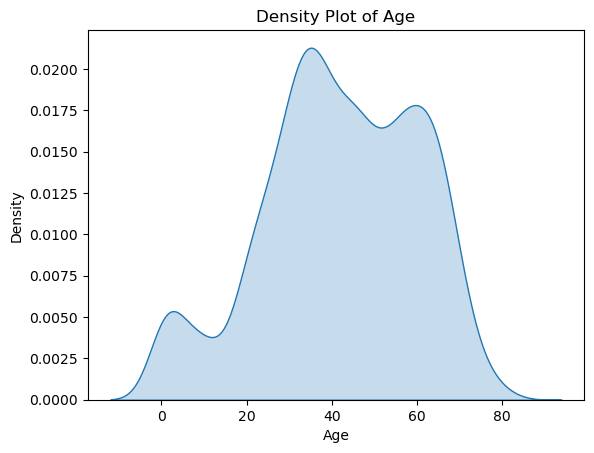

In [34]:
sns.kdeplot(IBD_train_df['host_age'], shade=True)
plt.xlabel('Age')
plt.title('Density Plot of Age')
plt.show()

In [7]:
IBD_test_df.shape

(485, 38)

In [8]:
IBD_train_df['disease'].value_counts()

disease
D006262    1376
D043183     580
Name: count, dtype: int64

In [9]:
IBD_test_df['disease'].value_counts()

disease
D043183    374
D006262    111
Name: count, dtype: int64

In [10]:
IBD_train_df['sex'].value_counts()

sex
Female    974
Male      972
Name: count, dtype: int64

In [11]:
IBD_test_df['sex'].value_counts()

sex
Female    131
Male       52
Name: count, dtype: int64

In [12]:
IBD_train_df['host_age'].count()

1956

In [13]:
IBD_test_df['host_age'].count()

135

In [14]:
IBD_train_df['BMI'].count()

1956

In [15]:
IBD_test_df['BMI'].count()

0

In [16]:
relative_abundance_IBD = pd.read_csv('filtered_relative_abundance_IBD.csv')

In [17]:
relative_abundance_IBD.shape

(2441, 5193)

In [18]:
# Step 1: Find common UIDs between the two DataFrames
train_uids = IBD_train_df['uid']
test_uids = IBD_test_df['uid']


# Step 2: Filter both DataFrames to keep only the rows with common UIDs
train_relative_abundance_IBD = relative_abundance_IBD[relative_abundance_IBD['loaded_uid'].isin(train_uids)]
test_relative_abundance_IBD = relative_abundance_IBD[relative_abundance_IBD['loaded_uid'].isin(test_uids)]

# Step 3: Sort both DataFrames by the same order of UIDs
# First, sort the common_uids list to define the order
train_uids_sorted = sorted(train_uids)
test_uids_sorted = sorted(test_uids)

# Reindex both DataFrames to ensure they follow the same order
train_relative_abundance_IBD = train_relative_abundance_IBD.set_index('loaded_uid').loc[train_uids_sorted].reset_index()
train_metadata_IBD = IBD_train_df.set_index('uid').loc[train_uids_sorted].reset_index()

test_relative_abundance_IBD = test_relative_abundance_IBD.set_index('loaded_uid').loc[test_uids_sorted].reset_index()
test_metadata_IBD = IBD_test_df.set_index('uid').loc[test_uids_sorted].reset_index()

In [21]:
train_metadata_IBD.to_csv('train_metadata_IBD.csv', index=False)

In [25]:
train_relative_abundance_IBD.to_csv('train_relative_abundance_IBD.csv', index=False)

In [23]:
test_metadata_IBD.to_csv('test_metadata_IBD.csv', index=False)

In [26]:
test_relative_abundance_IBD.to_csv('test_relative_abundance_IBD.csv', index=False)

### check train and test dataset

In [2]:
import pandas as pd

In [3]:
train_df = pd.read_csv('train_relative_abundance_IBD.csv', index_col = False)

In [4]:
train_metadata = pd.read_csv('train_metadata_IBD.csv')

In [5]:
train_metadata['experiment_type'].value_counts()

experiment_type
Amplicon        1658
Metagenomics     298
Name: count, dtype: int64

In [7]:
common_uids = train_metadata[train_metadata['experiment_type']=='Amplicon']['uid']
len(common_uids)
# Step 2: Filter both DataFrames to keep only the rows with common UIDs
filtered_relative_abundance = train_df[train_df['loaded_uid'].isin(common_uids)]
filtered_metadata = train_metadata[train_metadata['uid'].isin(common_uids)]

# Step 3: Sort both DataFrames by the same order of UIDs
# First, sort the common_uids list to define the order
common_uids_sorted = sorted(common_uids)

# Reindex both DataFrames to ensure they follow the same order
filtered_relative_abundance = filtered_relative_abundance.set_index('loaded_uid').loc[common_uids_sorted].reset_index()
filtered_metadata = filtered_metadata.set_index('uid').loc[common_uids_sorted].reset_index()

In [10]:
filtered_relative_abundance.to_csv('train_relative_abundance_IBD_v2.csv', index= False)

In [11]:
filtered_metadata.to_csv('train_metadata_IBD_v2.csv', index=False)

In [9]:
filtered_metadata

,uid,accession_id,data_type,tool_used,results_version,last_updated,QCStatus,QCMessage,checking,project_id,...,sex,host_age,diet,longitude,latitude,BMI,Recent.Antibiotics.Use,antibiotics_used,Antibiotics.Dose,Days.Without.Antibiotics.Use
0,34044,ERR1074157,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Female,47.0,Omnivore,-81.7,26.4,38.62,NaN,NaN,NaN,180.0
1,34048,ERR1075093,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Female,53.0,Omnivore but do not eat red meat,-122.4,47.6,45.11,NaN,NaN,NaN,365.0
2,34049,ERR1075141,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Female,56.0,Omnivore,-75.1,38.3,29.63,NaN,NaN,NaN,180.0
3,34053,ERR1075665,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Female,43.0,Omnivore,-122.4,37.8,21.70,NaN,NaN,NaN,365.0
4,34063,ERR1077771,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Female,2.0,Omnivore,-95.4,29.7,26.17,NaN,NaN,NaN,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,47504,ERR2091970,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Male,12.0,Omnivore,2.4,48.9,14.27,NaN,NaN,NaN,365.0
1654,47505,ERR2092044,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Male,37.0,Omnivore,-0.6,51.3,20.37,NaN,NaN,NaN,365.0
1655,47506,ERR2092060,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Male,46.0,Omnivore,-84.8,35.1,37.97,NaN,NaN,NaN,30.0
1656,47507,ERR2313952,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Male,34.0,Omnivore,153.0,-27.5,20.68,NaN,NaN,NaN,180.0


### same number of samples for both health and IBD

In [3]:
metadata_v2 = pd.read_csv('train_metadata_IBD_v2.csv', index_col = False)

In [7]:
metadata_v2['disease'].value_counts()

disease
D006262    1186
D043183     472
Name: count, dtype: int64

In [10]:
class_1 = metadata_v2[metadata_v2['disease'] == 'D006262']
class_2 = metadata_v2[metadata_v2['disease'] == 'D043183']

# Downsample class_1 to match the count of class_2
class_1_downsampled = class_1.sample(n=len(class_2), random_state=42)

# Combine the downsampled class_1 with class_2
metadata_balanced = pd.concat([class_1_downsampled, class_2])

# Shuffle the resulting dataframe
metadata_balanced = metadata_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Now df_balanced has equal numbers of D006262 and D043183

In [11]:
metadata_balanced

,uid,accession_id,data_type,tool_used,results_version,last_updated,QCStatus,QCMessage,checking,project_id,...,sex,host_age,diet,longitude,latitude,BMI,Recent.Antibiotics.Use,antibiotics_used,Antibiotics.Dose,Days.Without.Antibiotics.Use
0,37018,ERR1845753,amplicon,Mapseq,1.0,2019-01-01 00:00:00,1,NaN,3,PRJEB11419,...,Male,42.0,Omnivore,1.2,52.5,26.58,NaN,NaN,NaN,365.0
1,37123,ERR2032937,amplicon,Mapseq,1.0,2019-01-01 00:00:00,1,NaN,3,PRJEB11419,...,Male,63.0,Omnivore,-79.0,36.0,26.23,NaN,NaN,NaN,180.0
2,47308,ERR1250597,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Female,60.0,Omnivore,-116.4,43.8,21.46,NaN,NaN,NaN,365.0
3,36417,ERR1160543,amplicon,Mapseq,1.0,2019-01-01 00:00:00,1,NaN,3,PRJEB11419,...,Female,62.0,Omnivore,0.0,51.5,22.71,NaN,NaN,NaN,365.0
4,36704,ERR1389928,amplicon,Mapseq,1.0,2019-01-01 00:00:00,1,NaN,3,PRJEB11419,...,Male,62.0,Omnivore,-118.4,33.8,25.10,NaN,NaN,NaN,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,36686,ERR1389866,amplicon,Mapseq,1.0,2019-01-01 00:00:00,1,NaN,3,PRJEB11419,...,Male,30.0,Vegetarian but eat seafood,-76.6,39.3,18.79,NaN,NaN,NaN,365.0
940,36341,ERR1090557,amplicon,Mapseq,1.0,2019-01-01 00:00:00,1,NaN,3,PRJEB11419,...,Female,19.0,Vegetarian,0.0,0.0,22.14,NaN,NaN,NaN,180.0
941,47425,ERR1389803,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Female,18.0,Vegan,-0.2,51.7,23.23,NaN,NaN,NaN,365.0
942,37304,ERR2092112,amplicon,Mapseq,1.0,2019-01-01 00:00:00,1,NaN,3,PRJEB11419,...,Female,18.0,Omnivore,-117.8,33.9,22.60,NaN,NaN,NaN,365.0


In [12]:
relative_abundance_v2 = pd.read_csv('train_relative_abundance_IBD_v2.csv', index_col=False)

In [14]:
# Step 1: Find common UIDs between the two DataFrames
common_uids = set(metadata_balanced['uid'])

print(len(common_uids))

# Step 2: Filter both DataFrames to keep only the rows with common UIDs
filtered_relative_abundance = relative_abundance_v2[relative_abundance_v2['loaded_uid'].isin(common_uids)]
filtered_metadata = metadata_balanced[metadata_balanced['uid'].isin(common_uids)]

# Step 3: Sort both DataFrames by the same order of UIDs
# First, sort the common_uids list to define the order
common_uids_sorted = sorted(common_uids)

# Reindex both DataFrames to ensure they follow the same order
filtered_relative_abundance = filtered_relative_abundance.set_index('loaded_uid').loc[common_uids_sorted].reset_index()
filtered_metadata = filtered_metadata.set_index('uid').loc[common_uids_sorted].reset_index()

944


In [15]:
filtered_relative_abundance.to_csv('train_relative_abundance_IBD_v3.csv', index=False)

In [16]:
filtered_metadata.to_csv('train_metadata_IBD_v3.csv', index=False)

In [17]:
filtered_relative_abundance

,loaded_uid,9,10,11,13,16,17,18,19,20,...,2094023,2212691,2212731,2282523,2282740,2282741,2282742,2304691,2304692,2529408
0,34044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.006474,0.0,0.0,0.000000,0.0,0.0,0.0
1,34048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,34049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,34053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.008381,0.0,0.0,0.0
4,34063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,47504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
940,47505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.005146,0.0,0.0,0.0
941,47506,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
942,47507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.002783,0.0,0.0,0.0


In [18]:
filtered_metadata

,uid,accession_id,data_type,tool_used,results_version,last_updated,QCStatus,QCMessage,checking,project_id,...,sex,host_age,diet,longitude,latitude,BMI,Recent.Antibiotics.Use,antibiotics_used,Antibiotics.Dose,Days.Without.Antibiotics.Use
0,34044,ERR1074157,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Female,47.0,Omnivore,-81.7,26.4,38.62,NaN,NaN,NaN,180.0
1,34048,ERR1075093,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Female,53.0,Omnivore but do not eat red meat,-122.4,47.6,45.11,NaN,NaN,NaN,365.0
2,34049,ERR1075141,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Female,56.0,Omnivore,-75.1,38.3,29.63,NaN,NaN,NaN,180.0
3,34053,ERR1075665,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Female,43.0,Omnivore,-122.4,37.8,21.70,NaN,NaN,NaN,365.0
4,34063,ERR1077771,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Female,2.0,Omnivore,-95.4,29.7,26.17,NaN,NaN,NaN,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,47504,ERR2091970,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Male,12.0,Omnivore,2.4,48.9,14.27,NaN,NaN,NaN,365.0
940,47505,ERR2092044,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Male,37.0,Omnivore,-0.6,51.3,20.37,NaN,NaN,NaN,365.0
941,47506,ERR2092060,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Male,46.0,Omnivore,-84.8,35.1,37.97,NaN,NaN,NaN,30.0
942,47507,ERR2313952,amplicon,Mapseq,1.0,2019-05-28 10:11:31,1,NaN,3,PRJEB11419,...,Male,34.0,Omnivore,153.0,-27.5,20.68,NaN,NaN,NaN,180.0
